In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install nltk

In [ ]:
!pip install -q wordcloud
import wordcloud
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/emails.csv')

In [ ]:
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [ ]:
print('Shape of dataset: ',df.shape)

Shape of dataset:  (5728, 2)


In [ ]:
df.isnull().sum()

text    0
spam    0
dtype: int64

In [ ]:
print('Count of messages:\n',df['spam'].value_counts())

Count of messages:
 0    4360
1    1368
Name: spam, dtype: int64


In [ ]:
print('Not a spam mail ratio: ',round(len(df[df['spam']==0])/len(df['spam']),2)*100,"%")
print('Spam mail ratio: ',round(len(df[df['spam']==1])/len(df['spam']),2)*100,"%")

Not a spam mail ratio:  76.0 %
Spam mail ratio:  24.0 %


In [ ]:
df['length'] = df.text.str.len()
df.head()

,text,spam,length
0,Subject: naturally irresistible your corporate...,1,1484
1,Subject: the stock trading gunslinger fanny i...,1,598
2,Subject: unbelievable new homes made easy im ...,1,448
3,Subject: 4 color printing special request add...,1,500
4,"Subject: do not have money , get software cds ...",1,235


In [ ]:
df['text'] = df['text'].str.lower()
df.head()

,text,spam,length
0,subject: naturally irresistible your corporate...,1,1484
1,subject: the stock trading gunslinger fanny i...,1,598
2,subject: unbelievable new homes made easy im ...,1,448
3,subject: 4 color printing special request add...,1,500
4,"subject: do not have money , get software cds ...",1,235


In [ ]:
#Replacing email addresses with 'email'
df['text'] =df['text'].str.replace(r'^.+@[^\.]/*].[a-z](2,)$','emailaddress')
#Replace URL with 'webaddress'
df['text'] = df['text'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z](2,3)(/\S*)','webaddress')
#Replace currency symbols
df['text'] = df['text'].str.replace(r'$','dollars')
#Replace 10 digit phone numbers
df['text'] = df['text'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phone')
#Replace numberic char
df['text'] = df['text'].str.replace(r'\d+(\.\d+)?','number')

In [ ]:
#Removing punctuations
df['text'] = df['text'].str.replace(r'[^\w\d\s]',' ')
#Replacing whitespace with single space
df['text'] = df['text'].str.replace(r'\s+',' ')
#Rempving leading and trailing whitespace
df['text'] = df['text'].str.replace(r'^\s+?$',' ')

In [ ]:
df['text'].head(10)

0    Subject naturally irresistible your corporate ...
1    Subject the stock trading gunslinger fanny is ...
2    Subject unbelievable new homes made easy im wa...
3    Subject number color printing special request ...
4    Subject do not have money get software cds fro...
5    Subject great nnews hello welcome to medzonlin...
6    Subject here s a hot play in motion homeland s...
7    Subject save your money buy getting this thing...
8    Subject undeliverable home based business for ...
9    Subject save your money buy getting this thing...
Name: text, dtype: object

In [ ]:
#Removing stopwords
import string
import nltk
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english')+['u','4','2','in','dont','doin'])
df['text'] = df['text'].apply(lambda x: " ".join(term for term in x.split() if term not in stop_words))

In [ ]:
#Length of the text messages after removal of punctuation and stop words
df['new_length'] = df.text.str.len()
df.drop('clean_length',axis=1,inplace=True)
df.head()

,text,spam,length,new_length
0,Subject naturally irresistible corporate ident...,1,1484,1113
1,Subject stock trading gunslinger fanny merrill...,1,598,505
2,Subject unbelievable new homes made easy im wa...,1,448,320
3,Subject number color printing special request ...,1,500,396
4,Subject money get software cds software compat...,1,235,131


In [ ]:
print("Original length: ",df.length.sum())
print("New length: ",df.new_length.sum())
rem = df.length.sum() - df.new_length.sum()
print("Total words removed: ",rem)

Original length:  8917171
New length:  6267274
Total words removed:  2649897


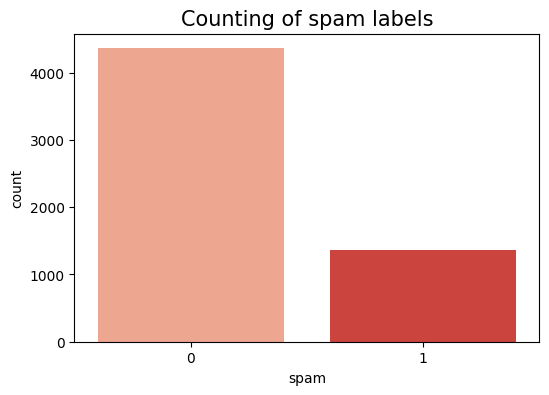

0    4360
1    1368
Name: spam, dtype: int64


In [ ]:
#Visualization of  spam labels
import seaborn as sns
plt.figure(figsize=(6, 4))
sns.countplot(x='spam', data=df, palette='Reds')
plt.title("Counting of spam labels", fontsize=15)
plt.xticks(rotation='horizontal')
plt.show()
print(df['spam'].value_counts())

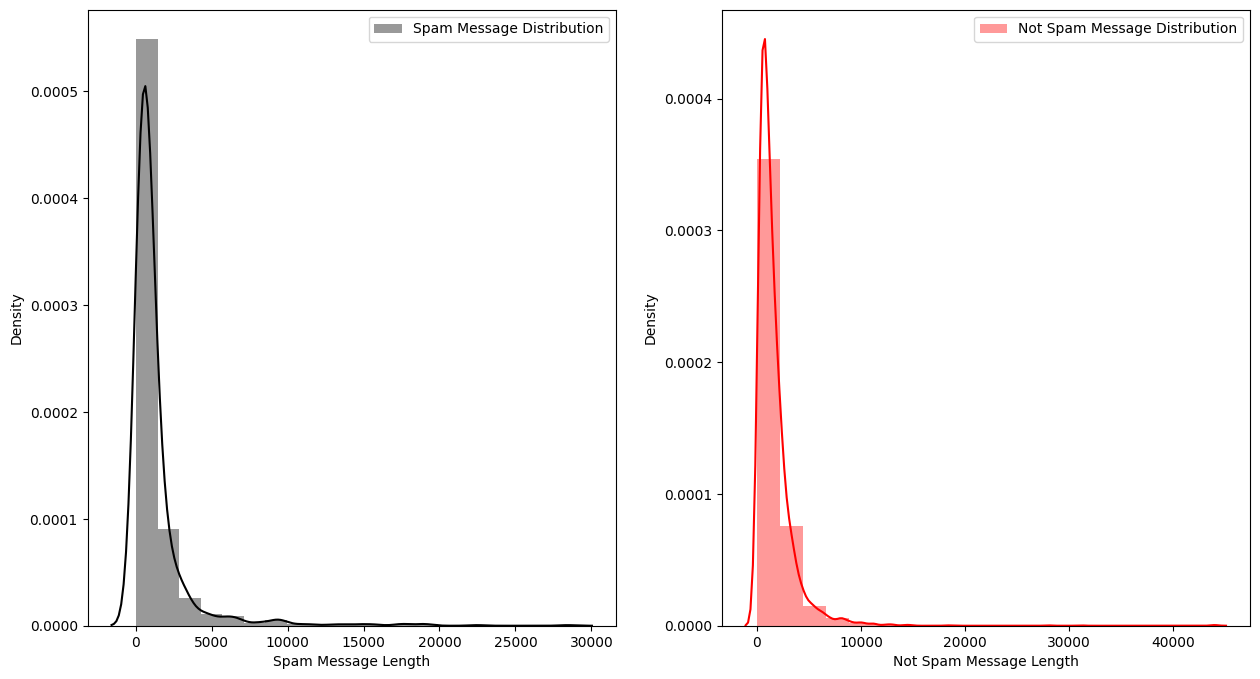

In [ ]:
f, ax = plt.subplots(1,2,figsize=(15,8))
sns.distplot(df[df['spam']==1]['length'],bins=20,ax=ax[0],label='Spam Message Distribution',color='black')
ax[0].set_xlabel('Spam Message Length')
ax[0].legend()
sns.distplot(df[df['spam']==0]['length'],bins=20,ax=ax[1],label='Not Spam Message Distribution',color='red')
ax[1].set_xlabel('Not Spam Message Length')
ax[1].legend()
plt.show()


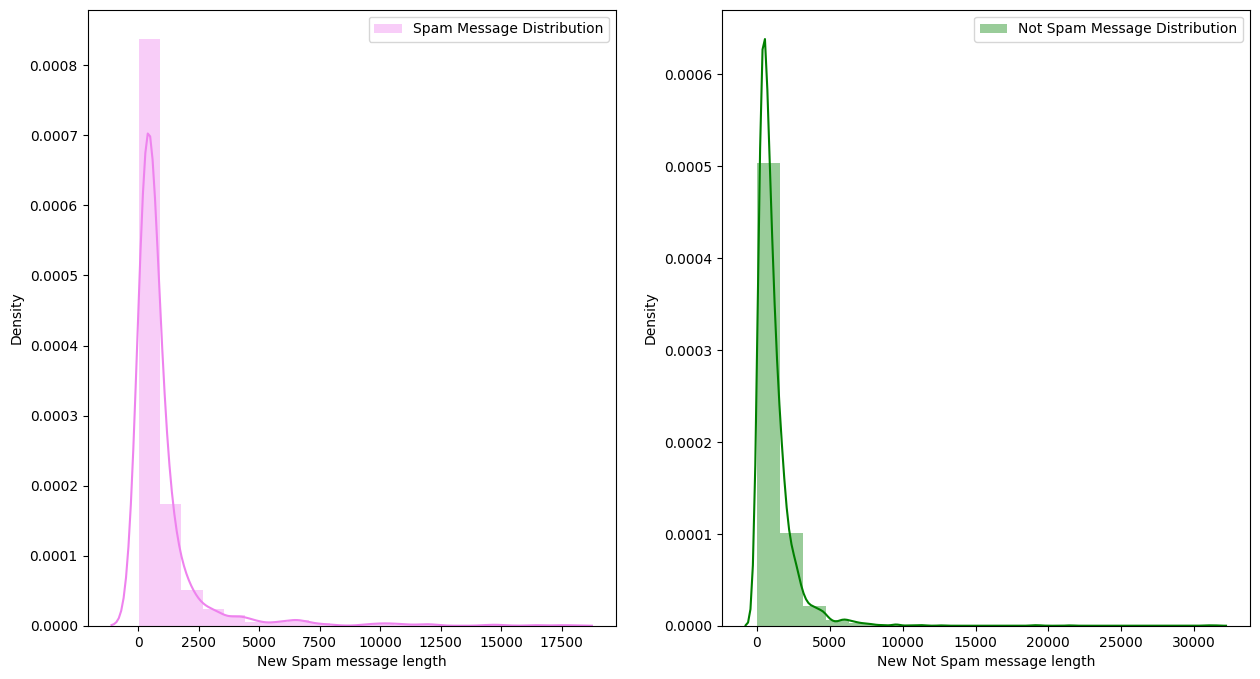

In [ ]:
f,ax = plt.subplots(1,2,figsize=(15,8))
sns.distplot(df[df['spam']==1]['new_length'],bins=20,ax=ax[0],label="Spam Message Distribution",color="violet")
ax[0].set_xlabel('New Spam message length')
ax[0].legend()
sns.distplot(df[df['spam']==0]['new_length'],bins=20,ax=ax[1],label="Not Spam Message Distribution",color="green")
ax[1].set_xlabel('New Not Spam message length')
ax[1].legend()
plt.show()

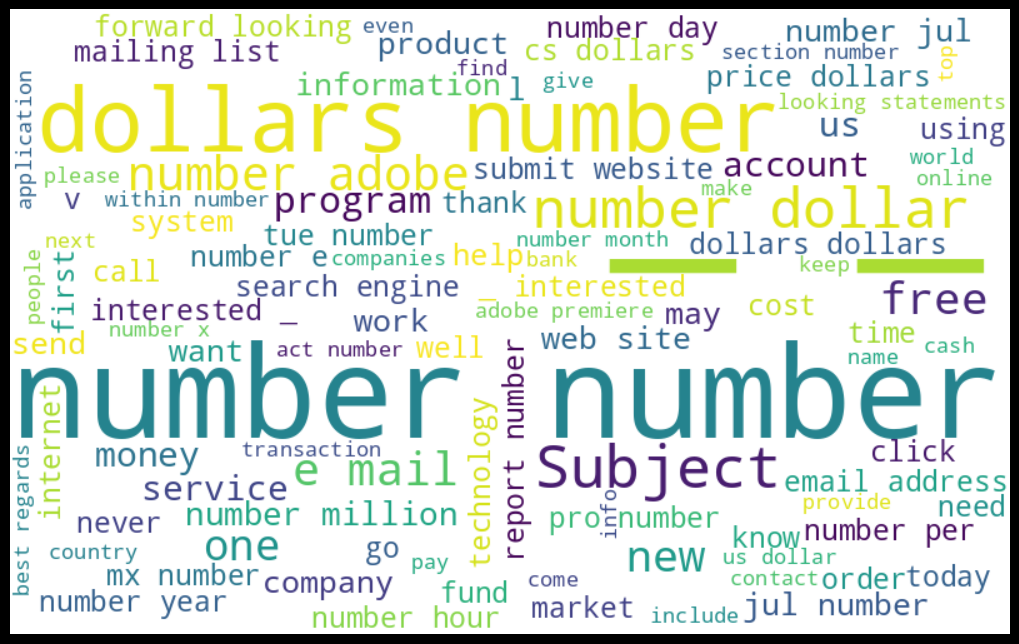

In [ ]:
from wordcloud import WordCloud
spams = df['text'][df['spam']==1]

spam_cloud = WordCloud(width=800,height=500,background_color="white",max_words=100).generate(' '.join(spams))
plt.figure(figsize=(10,8),facecolor="black")
plt.imshow(spam_cloud,interpolation="bilinear")
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

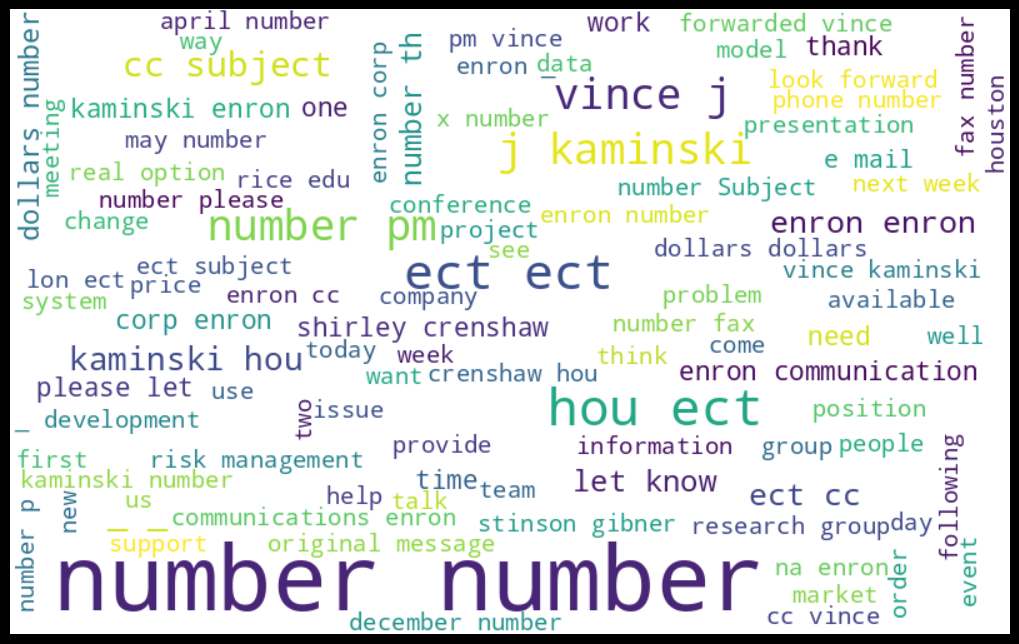

In [ ]:
from wordcloud import WordCloud
not_spams = df['text'][df['spam']==0]

spam_cloud = WordCloud(width=800,height=500,background_color="white",max_words=100).generate(' '.join(not_spams))
plt.figure(figsize=(10,8),facecolor="black")
plt.imshow(spam_cloud,interpolation="bilinear")
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
#Converting text into vectors
from sklearn.feature_extraction.text import TfidfVectorizer
tf_vec = TfidfVectorizer()
#Initialize MultinomialNB classifier
SVM = SVC(C=1.0,kernel='linear',degree=3,gamma='auto')
#Split feature and label
features = tf_vec.fit_transform(df['text'])
X=features
y=df['spam']

In [ ]:
X_train,x_test,Y_train,y_test = train_test_split(X,y,random_state=42)
SVM.fit(X_train,Y_train)
y_pred = SVM.predict(x_test)
print("final score=>",accuracy_score(y_test,y_pred))

final score=> 0.9916201117318436


In [ ]:
y_pred

array([0, 0, 0, ..., 0, 1, 0])

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1063
           1       0.99      0.98      0.98       369

    accuracy                           0.99      1432
   macro avg       0.99      0.99      0.99      1432
weighted avg       0.99      0.99      0.99      1432



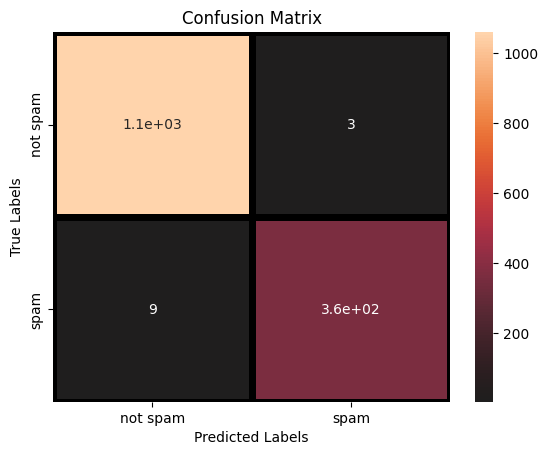

In [ ]:
c_mat = confusion_matrix(y_test,y_pred)
ax = plt.subplot()
sns.heatmap(c_mat,annot=True,ax=ax,linewidth=5,linecolor='Black',center=0)
ax.set_xlabel('Predicted Labels')
ax.set_ylabel("True Labels")
ax.set_title("Confusion Matrix")
ax.xaxis.set_ticklabels(['not spam','spam'])
ax.yaxis.set_ticklabels(['not spam','spam'])
plt.show()

In [ ]:
import pickle
fname='SpamFilter.pkl'
m = open(fname,'wb')
pickle.dump(SVM,m)
m.close()